# PILL SEABORN

Original Data Source: https://www.kaggle.com/datasets/unsdsn/world-happiness

## Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries according to their levels of happiness, was launched at the United Nations in a event celebrating the International Day of Happiness on March 20. The report continues to gain global recognition as happiness indicators are increasingly used by governments, organizations and civil society to inform their policy-making decisions. Leading experts in every field - economics, psychology, survey analysis, national statistics, health, public policy, and more - describe how measurements of well-being can be used effectively to assess the progress of nations.

## Contents
Happiness scores and rankings use data from the Gallup World Poll. Scores are based on responses to the main life assessment question asked in the survey. This question, known as Cantril's ladder, asks respondents to think of a ladder with the best possible life for them at 10 and the worst possible life at 0, and to rate their own current lives on that scale. The scores come from nationally representative samples for the years 2013-2016 and use Gallup weights to make the estimates representative. The columns following the happiness score estimate the degree to which each of the six factors (economic output, social support, life expectancy, freedom, absence of corruption, and generosity) contribute to higher life evaluations in each country than in the dystopia, a hypothetical country that has values equal to the lowest national averages in the world for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

## What is dystopia?

Dystopia is an imaginary country that has the least happy people in the world. The purpose of setting the dystopia is to have a benchmark against which all countries can be compared favorably (no country performs poorer than the dystopia) in terms of each of the six key variables, thus allowing each sub-bar be of positive width. The lowest scores observed for all six key variables therefore characterize dystopia. Since life would be very unpleasant in a country with the lowest income in the world, the lowest life expectancy, the lowest generosity, the most corruption, the least freedom and the least social support, it is known as "dystopia". ", in contrast to utopia.

On the happiness reports of 2015 and 2016, carry out the following explorations:

* Load the two csv as dataframes
* Identifies the columns of both datasets. Are there differences between both datasets?
* Join both dataframes, regardless of whether they share the same differences.
* Check the number of nulls in each column, as well as their percentage.
* Changes the null values of the "Lower Confidence Interval" and "Upper Confidence Interval" columns to a random number between the minimum and maximum value of the same column (a single number, you don't need a different one for each row with a null value) .
* Replaces null values in the "Standard Error" column with their mean squared.
* Obtain a statistical summary of the dataframe without null values.
* Graphically shows the relationship between family and health.
* Graphically shows the relationship between the happiness score and trust (Government Corruption)
* Shows the correlation matrix of the daframe
* Knowing that after joining the dataframes, the countries will appear more than once, it shows the dataframe grouped by country showing the maximum value of happiness, regardless of the year. Then, get the highest 5 countires and the lowest 5 contries by happiness score, finally show a bar chart of the scores by country.
* Is happiness related to generosity? Show it graphically through the freedom score.
* Shows the distribution of the degree of dystopia depending on the region.

# SOLUTION

In [1]:
import pandas as pd

Load the two csv as dataframes

In [2]:
df_15 = pd.read_csv('2015.csv')
df_16 = pd.read_csv('2016.csv')

Identifies the columns of both datasets. Are there differences between both datasets?

In [3]:
df_15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
df_16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [5]:
df_15.shape

(158, 12)

In [6]:
df_16.shape

(157, 13)

In [7]:
set(df_15.columns).symmetric_difference(set(df_16.columns))

{'Lower Confidence Interval', 'Standard Error', 'Upper Confidence Interval'}

We see that there are columns that are not common, so they will take null values:
* Standard Error
* Lower Confidence Interval
* Upper Confidence Interval

Join both dataframes, regardless of whether they share the same differences.

In [8]:
df = pd.concat([df_15, df_16], ignore_index=True, join='outer')

In [9]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN


In [10]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Lower Confidence Interval',
       'Upper Confidence Interval'],
      dtype='object')

Check the number of nulls in each column, as well as their percentage.

In [11]:
print("*AMOUNT of null data per column in the dataframe")
print(df.isnull().sum())
print("----------------------------------")
print("*PERCENTAGE of null data per column in the dataframe")
print(df.isnull().sum()/len(df)*100)

*AMOUNT of null data per column in the dataframe
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval        158
Upper Confidence Interval        158
dtype: int64
----------------------------------
*PERCENTAGE of null data per column in the dataframe
Country                           0.00000
Region                            0.00000
Happiness Rank                    0.00000
Happiness Score                   0.00000
Standard Error                   49.84127
Economy (GDP per Capita)          0.00000
Family                            0.00000
Health (Life Expectancy)          0.00

Changes the null values of the "Lower Confidence Interval" and "Upper Confidence Interval" columns to a random number between the minimum and maximum value of the same column (a single number, you don't need a different one for each row with a null value) .

In [12]:
import numpy as np

In [13]:
round(df["Lower Confidence Interval"].min(),2)

2.73

In [14]:
round(df["Lower Confidence Interval"].max(),2)

7.46

In [15]:
# Create a function to return the random value

def get_random(df_column):
    min_value = df_column.min()
    max_value = df_column.max()
    
    return np.random.randint(min_value, max_value, 1)[0]

In [16]:
df['Lower Confidence Interval'] = df['Lower Confidence Interval'].fillna(get_random(df_column = df['Lower Confidence Interval']))

In [17]:
df['Lower Confidence Interval'].value_counts().head()

4.000    158
4.259      2
4.750      2
3.621      2
4.374      1
Name: Lower Confidence Interval, dtype: int64

In [18]:
df['Upper Confidence Interval'] = df['Upper Confidence Interval'].fillna(
    get_random(df_column = df['Upper Confidence Interval'])
)

In [19]:
df['Upper Confidence Interval'].value_counts().head()

4.000    158
5.267      2
5.131      2
5.923      2
4.591      1
Name: Upper Confidence Interval, dtype: int64

Replaces null values in the "Standard Error" column with their mean squared.

In [20]:
df['Standard Error'] = df['Standard Error'].fillna(
    (df['Standard Error'].mean())**2
)

Obtain a statistical summary of the dataframe without null values.

In [21]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,79.238095,5.378949,0.025161,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032,4.639162,4.738635
std,45.538922,1.141531,0.025851,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728,1.033074,1.092017
min,1.000000,2.839000,0.002293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.732000,3.078000
25%,40.000000,4.510000,0.002293,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135,4.000000,4.000000
50%,79.000000,5.286000,0.018480,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260,4.000000,4.000000
75%,118.500000,6.269000,0.043940,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470,5.231500,5.408500
max,158.000000,7.587000,0.136930,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720,7.460000,7.669000


In [22]:
df.describe(include="all")

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
count,315,315,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
unique,164,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Switzerland,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,79.238095,5.378949,0.025161,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032,4.639162,4.738635
std,NaN,NaN,45.538922,1.141531,0.025851,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728,1.033074,1.092017
min,NaN,NaN,1.000000,2.839000,0.002293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.732000,3.078000
25%,NaN,NaN,40.000000,4.510000,0.002293,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135,4.000000,4.000000
50%,NaN,NaN,79.000000,5.286000,0.018480,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260,4.000000,4.000000
75%,NaN,NaN,118.500000,6.269000,0.043940,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470,5.231500,5.408500


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        315 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 315 non-null    int64  
 3   Happiness Score                315 non-null    float64
 4   Standard Error                 315 non-null    float64
 5   Economy (GDP per Capita)       315 non-null    float64
 6   Family                         315 non-null    float64
 7   Health (Life Expectancy)       315 non-null    float64
 8   Freedom                        315 non-null    float64
 9   Trust (Government Corruption)  315 non-null    float64
 10  Generosity                     315 non-null    float64
 11  Dystopia Residual              315 non-null    float64
 12  Lower Confidence Interval      315 non-null    flo

In [24]:
df.describe(include="object")

,Country,Region
count,315,315
unique,164,10
top,Switzerland,Sub-Saharan Africa
freq,2,78


In [25]:
# Let's verify if we haven't any null value
print("*AMOUNT of null data per column in the dataframe")
print(df.isnull().sum())

*AMOUNT of null data per column in the dataframe
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Lower Confidence Interval        0
Upper Confidence Interval        0
dtype: int64


Graphically shows the relationship between family and health.

In [26]:
df["Family"].head()

0    1.34951
1    1.40223
2    1.36058
3    1.33095
4    1.32261
Name: Family, dtype: float64

In [27]:
df["Health (Life Expectancy)"].head()

0    0.94143
1    0.94784
2    0.87464
3    0.88521
4    0.90563
Name: Health (Life Expectancy), dtype: float64

In [28]:
import seaborn as sns

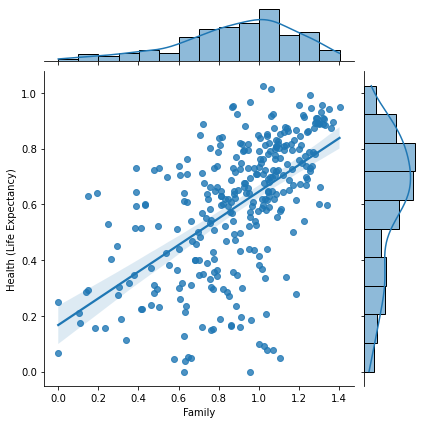

In [29]:
sns.jointplot(x='Family', y='Health (Life Expectancy)', data=df, kind='reg')

Graphically shows the relationship between the happiness score and trust (Government Corruption)

In [30]:
df["Happiness Score"].head(3)

0    7.587
1    7.561
2    7.527
Name: Happiness Score, dtype: float64

In [31]:
df['Trust (Government Corruption)'].head(3)

0    0.41978
1    0.14145
2    0.48357
Name: Trust (Government Corruption), dtype: float64

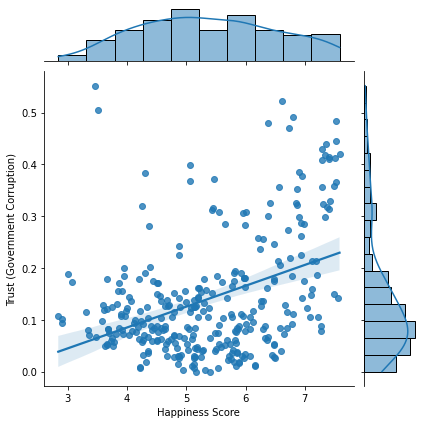

In [32]:
sns.jointplot(x='Happiness Score', y='Trust (Government Corruption)', data=df, kind='reg')

Shows the correlation matrix of the daframe

In [33]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
Happiness Rank,1.000000,-0.993905,0.057798,-0.783247,-0.686502,-0.741182,-0.545570,-0.378864,-0.152613,-0.522146,-0.551931,-0.517745
Happiness Score,-0.993905,1.000000,-0.061461,0.779171,0.693547,0.734491,0.556414,0.397989,0.168272,0.526343,0.553648,0.518766
Standard Error,0.057798,-0.061461,1.000000,-0.186844,0.266522,0.027844,0.126096,-0.039259,-0.046720,-0.151971,-0.549045,-0.600246
Economy (GDP per Capita),-0.783247,0.779171,-0.186844,1.000000,0.566283,0.789103,0.331127,0.294856,-0.015402,0.079411,0.520120,0.499099
Family,-0.686502,0.693547,0.266522,0.566283,1.000000,0.569937,0.476671,0.205060,0.075987,0.053264,0.166458,0.119721
Health (Life Expectancy),-0.741182,0.734491,0.027844,0.789103,0.569937,1.000000,0.369799,0.249773,0.088002,0.025248,0.310571,0.271981
Freedom,-0.545570,0.556414,0.126096,0.331127,0.476671,0.369799,1.000000,0.492875,0.356615,0.034829,0.183165,0.152548
Trust (Government Corruption),-0.378864,0.397989,-0.039259,0.294856,0.205060,0.249773,0.492875,1.000000,0.289499,-0.023504,0.199268,0.181151
Generosity,-0.152613,0.168272,-0.046720,-0.015402,0.075987,0.088002,0.356615,0.289499,1.000000,-0.110632,0.102493,0.096643
Dystopia Residual,-0.522146,0.526343,-0.151971,0.079411,0.053264,0.025248,0.034829,-0.023504,-0.110632,1.000000,0.415069,0.413228


<AxesSubplot:>

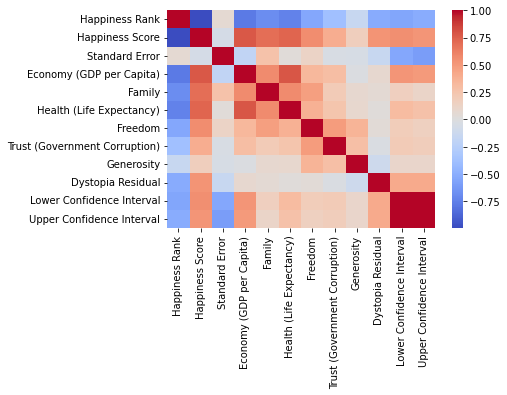

In [34]:
sns.heatmap(df.corr(), cmap='coolwarm')

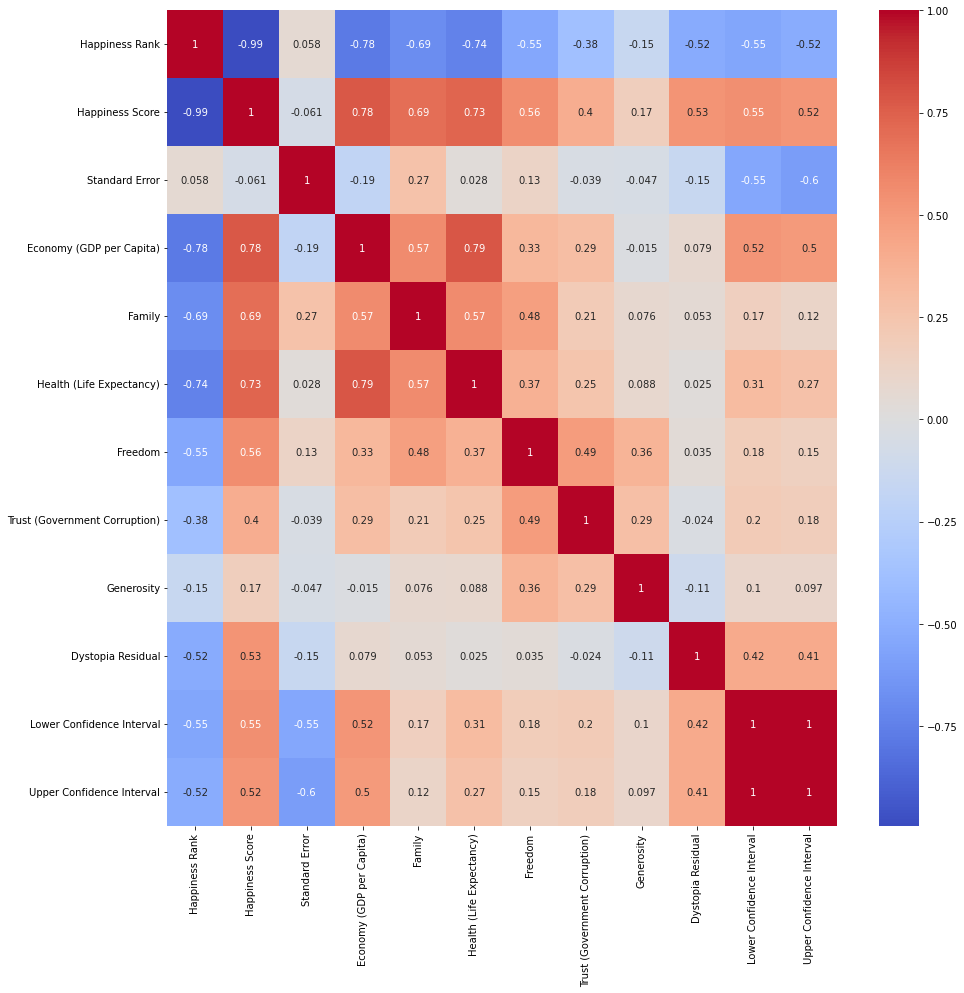

In [35]:
import matplotlib.pyplot as plt

# Increase fig size using matplotlib
fig, ax = plt.subplots(figsize=(15,15))
 

sns.heatmap(df.corr(), cmap='coolwarm', annot=True, ax=ax, fmt='.2g')
plt.show()

Knowing that after joining the dataframes, the countries will appear more than once, it shows the dataframe grouped by country showing the maximum value of happiness, regardless of the year. Then, get the highest 5 countires and the lowest 5 contries by happiness score, finally show a bar chart of the scores by country

In [36]:
df[(df["Country"] == "Iceland")]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
1,Iceland,Western Europe,2,7.561,0.048840,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,4.000,4.000
160,Iceland,Western Europe,3,7.501,0.002293,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,7.333,7.669


In [37]:
grouped_countires = df[['Country', 'Happiness Score']].groupby(['Country']).max()

In [38]:
head_5 = grouped_countires.sort_values(["Happiness Score"], ascending=False).head(5)
tail_5 = grouped_countires.sort_values(["Happiness Score"], ascending=False).tail(5)
merged = head_5.append(tail_5)
merged

,Happiness Score
Country,
Switzerland,7.587
Iceland,7.561
Denmark,7.527
Norway,7.522
Canada,7.427
Rwanda,3.515
Benin,3.484
Togo,3.303
Syria,3.069


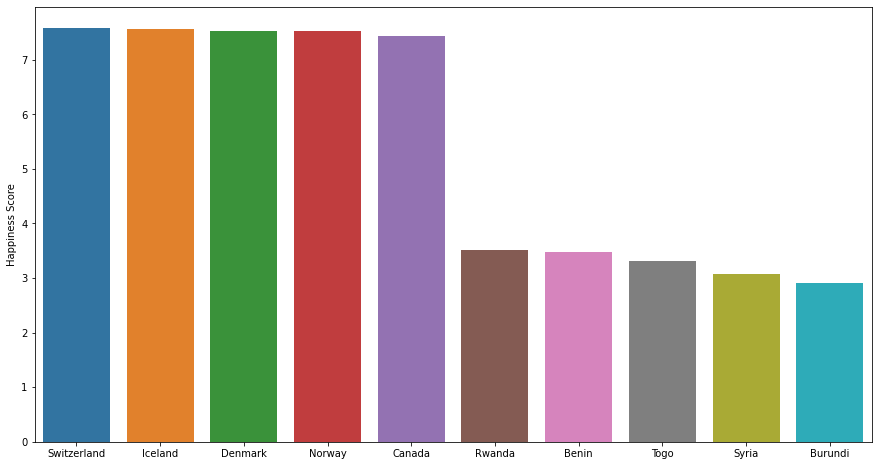

In [39]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(y=merged["Happiness Score"], 
            x=merged.index.values, 
            data=merged)
plt.show()

Is happiness related to generosity? Show it graphically through the freedom score.

<AxesSubplot:xlabel='Happiness Score', ylabel='Generosity'>

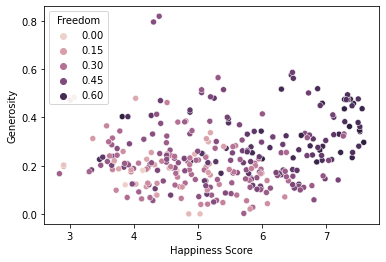

In [40]:
sns.scatterplot(data = df,
                x = 'Happiness Score',
                y="Generosity",
                hue = "Freedom")

Shows the distribution of the degree of dystopia depending on the region.

[]

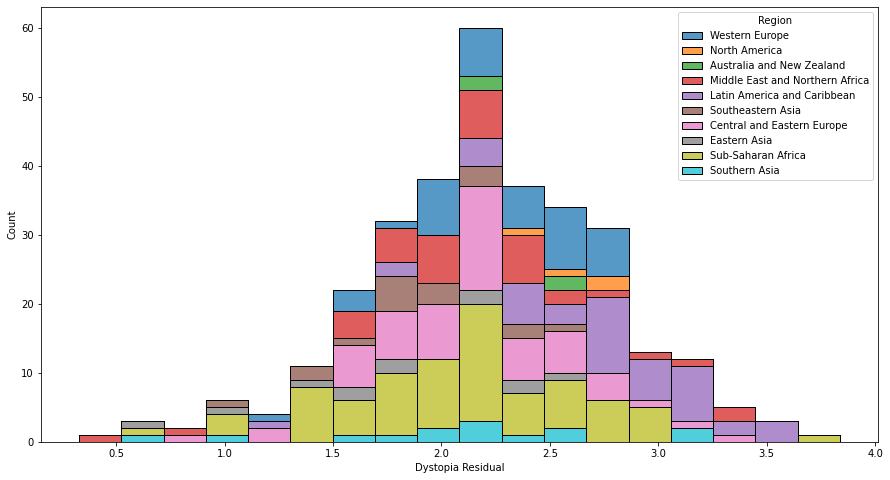

In [41]:
fig, ax = plt.subplots(figsize=(15,8))

sns.histplot(data = df, x =df['Dystopia Residual'], hue=df["Region"], multiple="stack")

plt.plot()

[]

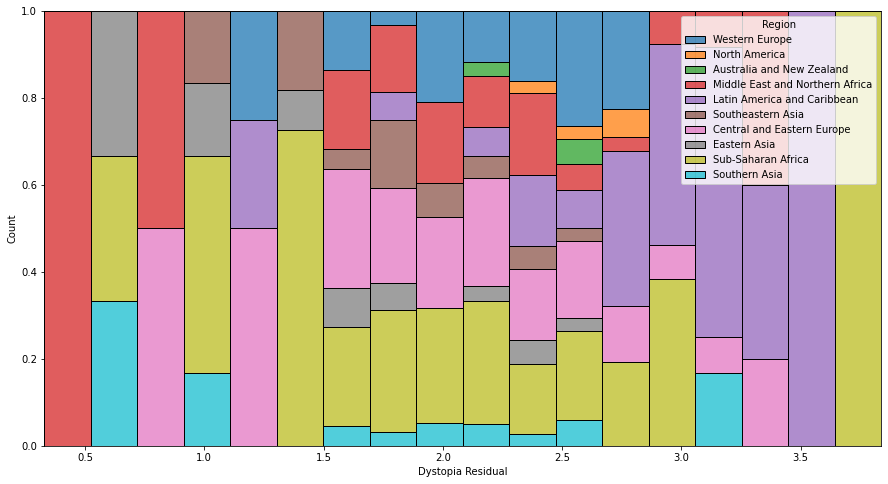

In [42]:
fig, ax = plt.subplots(figsize=(15,8))

sns.histplot(data = df, x =df['Dystopia Residual'], hue=df["Region"], multiple="fill")

plt.plot()

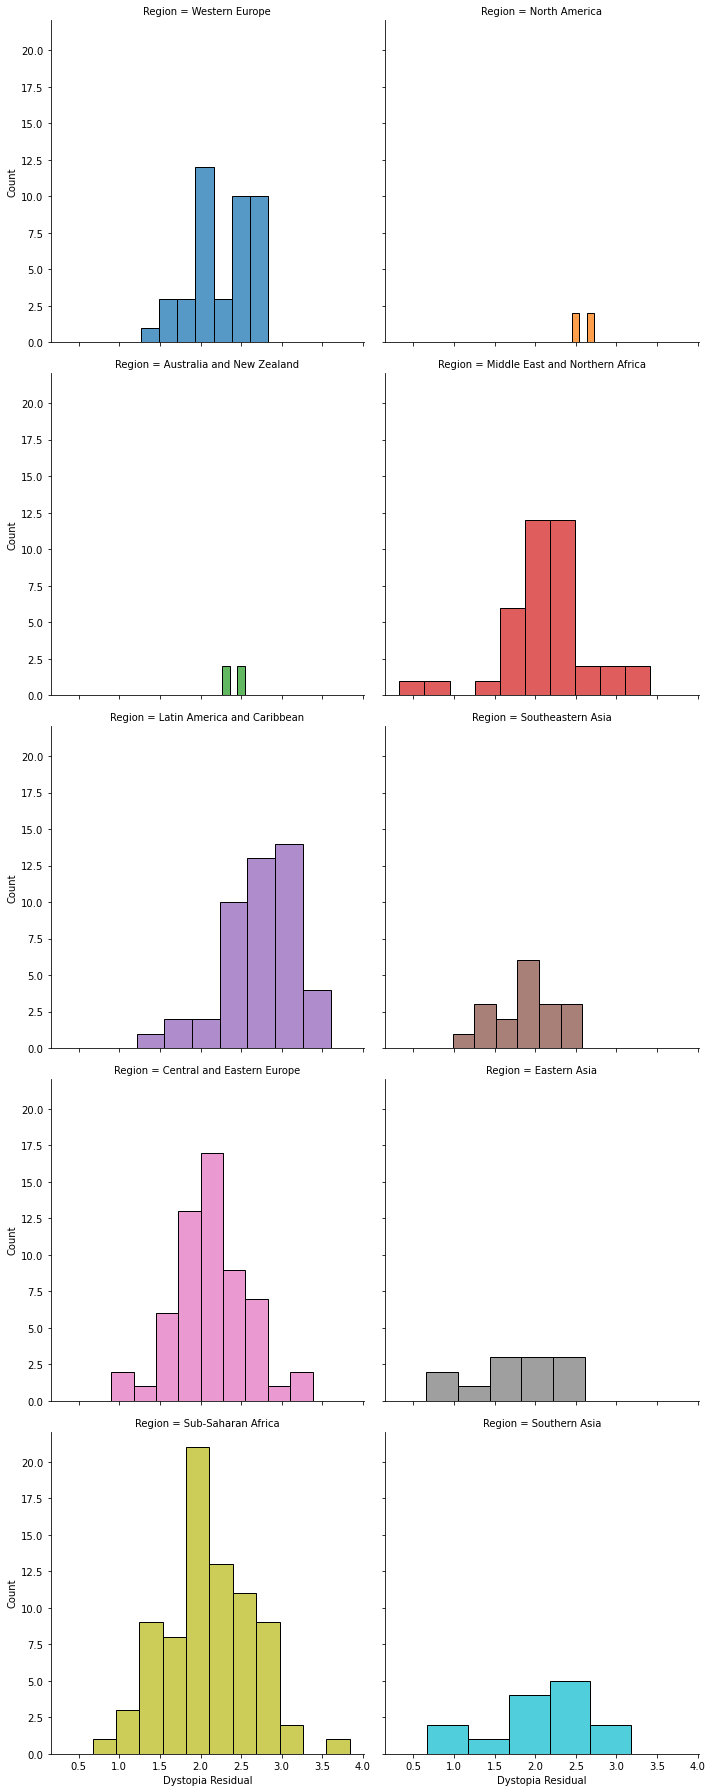

In [43]:
g = sns.FacetGrid(df, col="Region", hue = "Region", height=5, col_wrap=2)

g.map(sns.histplot, "Dystopia Residual")